In [1291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### **Загружаем выборку Diamonds**


1.   PRICE: price in US dollars (326-18,823)
2.   CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [1292]:
diamonds_df = pd.read_csv('diamonds.csv')

In [1293]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


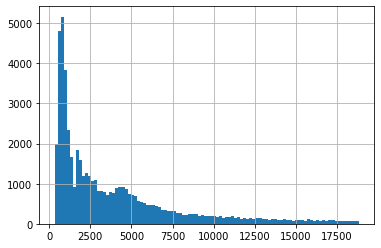

In [1294]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

#**Подготовка данных**

In [1295]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [1296]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [1297]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [1298]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [1299]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [1300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

#**Обучаем модель линейной регрессии**

In [1301]:
reg = LinearRegression().fit(X_train, y_train)

In [1302]:

y_pred = reg.predict(X_test)

In [1303]:
score = r2_score(y_pred, y_test)

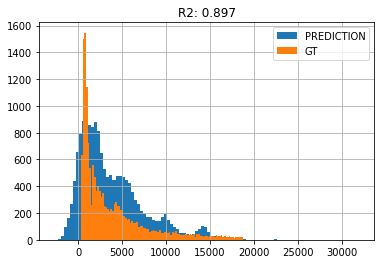

In [1304]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [1305]:
reg = MLPRegressor(activation='logistic', max_iter=10)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_pred, y_test)
print("Score: ", score)

#plt.figure(figsize=(10, 8))
#plt.plot(Loss_values)
#plt.title('Функция потерь', fontsize=15)
#plt.xlabel('номер итерации', fontsize=14)
#plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
#plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score:  -63181340.39284156


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


#**Создаём модель MLP для задачи регрессии**

In [1306]:
class Linear:
    def __init__(self, input_size, output_size):
        '''
        Creates weights and biases for linear layer.
        Dimention of inputs is *input_size*, of output: *output_size*.
        '''
        #### YOUR CODE HERE
        #### Create weights, initialize them with samples from N(0, 0.1).
        self.W = np.random.randn(input_size, output_size)*0.01
        self.b = np.zeros(output_size)

    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, input_size).
        Returns output of size (N, output_size).
        Hint: You may need to store X for backward pass
        '''
        self.X = X
        return X.dot(self.W)+self.b

    def backward(self, dLdy):
        '''
        1. Compute dLdw and dLdx.
        2. Store dLdw for step() call
        3. Return dLdx
        '''
        self.dLdW = self.X.T.dot(dLdy)
        self.dLdb = dLdy.sum(0)
        self.dLdx = dLdy.dot(self.W.T)
        return self.dLdx

    def step(self, learning_rate):
        '''
        1. Apply gradient dLdw to network:
        w <- w - learning_rate*dLdw
        '''
        self.W = self.W - learning_rate * self.dLdW
        self.b = self.b - learning_rate * self.dLdb

In [1307]:
class Sigmoid:
    def __init__(self):
        pass
    
    def forward(self, X):
        self.s = 1./(1+np.exp(-X))
        return self.s
    
    def backward(self, dLdy):
        return self.s*(1-self.s)*dLdy
    
    def step(self, learning_rate):
        pass

In [1308]:
class ReLU:
    def __init__(self):
        pass
    
    def forward(self, X):
        '''
        Passes objects through this layer.
        X is np.array of size (N, d)
        '''
        self.s = np.maximum(X, 0)
        return self.s
    
    def backward(self, dLdy):
        return self.s*1. * (dLdy > 0)
    
    def step(self, learning_rate):
        pass

In [1309]:
class MyLinear:
  def __init__(self, input_size, output_size, outer=False):
    self.outer = outer
    if outer is False:
      self.w = np.random.normal(size=(output_size, input_size)) * 0.1
      self.b = np.zeros(output_size)
    else:
      self.w = np.random.normal(size=(1, input_size)) * 0.1
      self.b = np.zeros(1)

  def loss(y_pred, y):
    return np.mean((y_pred - y) ** 2)

  def sigmoid(self, X):
      return 1 / (1 + np.exp(-X))

  def sigmoid_derivative(self, x):
      return self.sigmoid(x) * (1 - self.sigmoid(x))

  def ReLU(self, x):
    return np.maximum(x, 0)

  def relu_derivative(self, x):
    return 1. * (x > 0)
  
  def activate(self, x):
       #return self.sigmoid(x)
       return self.ReLU(x)

  def forward(self, X):
    self.X = X
    self.Y = self.X @ self.w.T + self.b
    #self.Y = self.activate(self.Y)
    #if self.outer != True:
    #   self.Y = self.activate(self.Y)
    return self.Y

  def backward(self, dLdy): #dldw = dldy * dydw, dldx = dldy*dydx
    #if self.outer != True:
      #dLdy = dLdy * self.sigmoid_derivative(self.Y)
    #  dLdy = dLdy * self.relu_derivative(self.Y)
    #dLdy = dLdy * self.relu_derivative(self.Y)
    self.dLdw = dLdy.T @ self.X       
                                                                                                                                  
    self.dLdb = np.zeros(self.b.shape)
    for i in range(dLdy.T.shape[0]):
      self.dLdb[i] = np.mean(dLdy.T[i])
    dLdx = dLdy @ self.w
    return dLdx

  def step(self, learning_rate):
    self.w -= learning_rate * self.dLdw
    self.b -= learning_rate * self.dLdb


In [1310]:
X_train.shape

(37758, 9)

In [1311]:
np.ones([(X_train.shape[0])]).reshape(-1, 1).shape

(37758, 1)

In [1312]:
#X_train_new = np.hstack((X_train, np.ones([(X_train.shape[0])]).reshape(-1, 1)))
#X_train_new.shape

In [1313]:
class NLLLoss:
    def __init__(self):
        '''
        Applies Softmax operation to inputs and computes NLL loss
        '''
        pass
    
    def forward(self, X, y):
        '''
        Passes objects through this layer.
        X is np.array of size (N, C), where C is the number of classes
        y is np.array of size (N), contains correct labels
        '''
        self.p = np.exp(X)
        self.p /= self.p.sum(1, keepdims=True)
        self.y = np.zeros((X.shape[0], X.shape[1]))
        self.y[np.arange(X.shape[0]), y] = 1
        return -(np.log(self.p)*self.y).sum(1).mean(0)
    
    def backward(self):
        '''
        Note that here dLdy = 1 since L = y
        1. Compute dLdx
        2. Return dLdx
        '''
        return (self.p - self.y) / self.y.shape[0]

In [1314]:
class MLPRegressor:
    def __init__(
        self,
        hidden_layer_sizes=(100,),
        learning_rate=0.0001,
        max_iter=10
    ):
          self.X = None
          self.Y = None
          self.hidden_layer_sizes = hidden_layer_sizes
          self.layers = []
          self.learning_rate = learning_rate=0.001,
          self.max_iter = max_iter
          


    def loss(self, y_pred, y):
      return 0.5 * np.mean((y - y_pred) ** 2)

    def sigmoid(self, X):
      return 1 / (1 + np.exp(-X))

    def sigmoid_derivative(self, x):
      return self.sigmoid(x) * (1 - self.sigmoid(x))


    def forward(self, X):
      for layer in self.layers:
          X = layer.forward(X)
      return X

    def ReLU(self, x):
      return np.maximum(x, 0)

    def relu_derivative(self, x):
      return 1. * (x > 0)

    def backward(self, dLdy):
      for layer in self.layers[::-1]:
        dLdy = layer.backward(dLdy)
        
    def step(self, learning_rate):
      for layer in self.layers:
        layer.step(learning_rate)

    def fit(self, X, y):
      #print("Fit")
      n = X.shape[1]
     
      for i in range(len(self.hidden_layer_sizes)): #заполняем скрытые слои нейронами
        input = 0
        output = 0
        if i == 0:
          input = n
        else:
          input = self.hidden_layer_sizes[i-1]
        output = self.hidden_layer_sizes[i]
        #self.layers.append(Linear(input, output))
        self.layers.append(MyLinear(input, output))
      self.layers.append(ReLU())
      self.layers.append(MyLinear(self.hidden_layer_sizes[-1], 1, True))
      #self.layers.append(Linear(self.hidden_layer_sizes[-1], 1))
      loss_values = []
      #X = np.hstack((X, np.ones([(X.shape[0])]).reshape(-1, 1)))
      for i in range(self.max_iter):
          print("Epoch " + str(i + 1) + "/" + str(self.max_iter))
          y_pred = (self.forward(X)) #проходим по всем скрытым слоям
          print("y_pred:", y_pred)
          print("y:", y)
          dLdy = (2 * (y_pred - y)) #* self.relu_derivative(y_pred)
          self.backward(dLdy)  
          self.step(self.learning_rate)
          print("loss:", self.loss(y_pred, y))
          loss_values.append(self.loss(y_pred, y))
          
      return loss_values
    
    def predict(self, X):
        return self.forward(X)

In [1315]:
X_train.shape

(37758, 9)

In [1316]:
y_train.shape

(37758, 1)

In [1317]:
y_train

array([[ 1013],
       [17360],
       [ 1440],
       ...,
       [ 1853],
       [ 2333],
       [ 1009]])

In [1318]:
my_X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])
my_X.shape
my_X_test = np.array([[2., 5.],
              [8., 2.],
              [-17., -2]])
my_X_test.shape

(3, 2)

In [1319]:
my_y = np.array([[3], [4], [5]])
my_y.shape
my_y_test = np.array([[6], [7], [1]])
my_y_test.shape

(3, 1)

In [1320]:
my_y

array([[3],
       [4],
       [5]])

In [1321]:
reg = MLPRegressor()
Loss_values = reg.fit(my_X, my_y)

Epoch 1/10
y_pred: [[ 0.13152287]
 [ 0.22699833]
 [-0.06358839]]
y: [[3]
 [4]
 [5]]
loss: 8.017271667271585
Epoch 2/10
y_pred: [[0.24682698]
 [0.38712436]
 [0.00210258]]
y: [[3]
 [4]
 [5]]
loss: 7.601968449958188
Epoch 3/10
y_pred: [[0.35413515]
 [0.53602203]
 [0.06583369]]
y: [[3]
 [4]
 [5]]
loss: 7.224290227242849
Epoch 4/10
y_pred: [[0.45478529]
 [0.67559656]
 [0.12772305]]
y: [[3]
 [4]
 [5]]
loss: 6.8781431261523975
Epoch 5/10
y_pred: [[0.54987244]
 [0.80740627]
 [0.18786527]]
y: [[3]
 [4]
 [5]]
loss: 6.558736732624134
Epoch 6/10
y_pred: [[0.63996506]
 [0.93224994]
 [0.24632953]]
y: [[3]
 [4]
 [5]]
loss: 6.263039703170006
Epoch 7/10
y_pred: [[0.72545902]
 [1.05066895]
 [0.30323162]]
y: [[3]
 [4]
 [5]]
loss: 5.988620583138451
Epoch 8/10
y_pred: [[0.80670329]
 [1.16315197]
 [0.35867324]]
y: [[3]
 [4]
 [5]]
loss: 5.733361885515016
Epoch 9/10
y_pred: [[0.88402538]
 [1.27015228]
 [0.41270873]]
y: [[3]
 [4]
 [5]]
loss: 5.495443068622433
Epoch 10/10
y_pred: [[0.95769378]
 [1.37204623]
 [0

In [1322]:
my_y_pred = reg.predict(my_X_test)
print("Predicted:", my_y_pred)
print("Test:", my_y_test)
score = r2_score(my_y_pred, my_y_test)
print("Score: ", score)

Predicted: [[1.72951937]
 [2.26799766]
 [1.90616   ]]
Test: [[6]
 [7]
 [1]]
Score:  -274.05735620112944


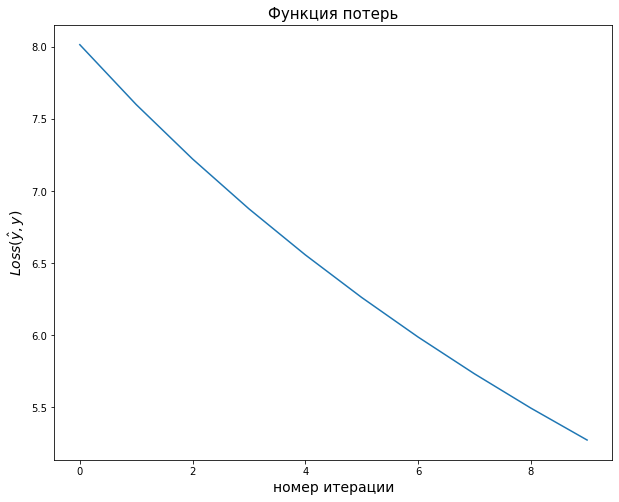

In [1323]:
plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

#**Проверяем модель MLP на выборке Diamonds**

Epoch 1/10
y_pred: [[-0.18154483]
 [-0.12012038]
 [-0.12342917]
 ...
 [-0.11022279]
 [-0.16606788]
 [-0.12330652]]
y: [[ 1013]
 [17360]
 [ 1440]
 ...
 [ 1853]
 [ 2333]
 [ 1009]]
loss: 15764160.06144162
Epoch 2/10
y_pred: [[75765.53299556]
 [85804.30735208]
 [69189.89240772]
 ...
 [62471.00326198]
 [73139.22223966]
 [66531.85647287]]
y: [[ 1013]
 [17360]
 [ 1440]
 ...
 [ 1853]
 [ 2333]
 [ 1009]]
loss: 2338630853.446486
Epoch 3/10
y_pred: [[-128.04940238]
 [-128.04940238]
 [-128.04940238]
 ...
 [-128.04940238]
 [-128.04940238]
 [-128.04940238]]
y: [[ 1013]
 [17360]
 [ 1440]
 ...
 [ 1853]
 [ 2333]
 [ 1009]]
loss: 16279664.885497546
Epoch 4/10
y_pred: [[-119.89172834]
 [-119.89172834]
 [-119.89172834]
 ...
 [-119.89172834]
 [-119.89172834]
 [-119.89172834]]
y: [[ 1013]
 [17360]
 [ 1440]
 ...
 [ 1853]
 [ 2333]
 [ 1009]]
loss: 16245703.794664932
Epoch 5/10
y_pred: [[-111.75076534]
 [-111.75076534]
 [-111.75076534]
 ...
 [-111.75076534]
 [-111.75076534]
 [-111.75076534]]
y: [[ 1013]
 [17360]


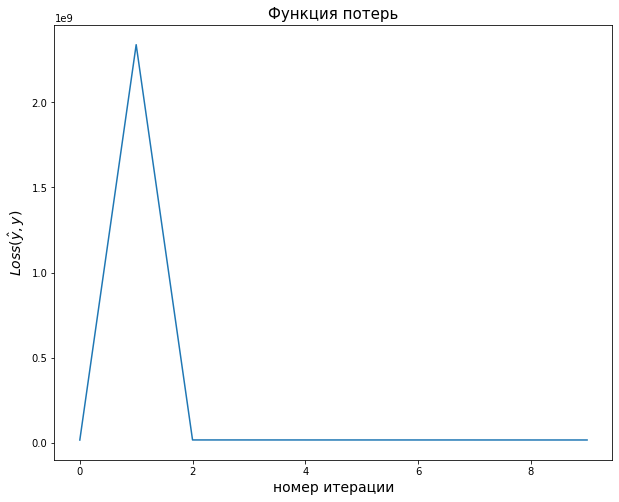

CPU times: user 1.88 s, sys: 932 ms, total: 2.81 s
Wall time: 1.67 s


In [1324]:
%%time

reg = MLPRegressor()
Loss_values = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_pred, y_test)
print("Score: ", score)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

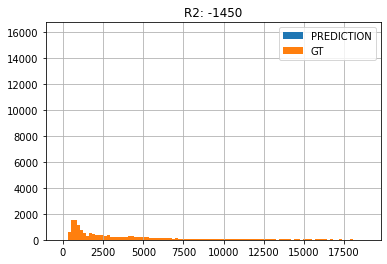

In [1325]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();